# **데이터 준비**

**필요한 패키지 및 라이브러리 import**

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")

**데이터 생성**

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204


# **직접 해보는 k-means clustering**

**Step 1. K값 정하기**

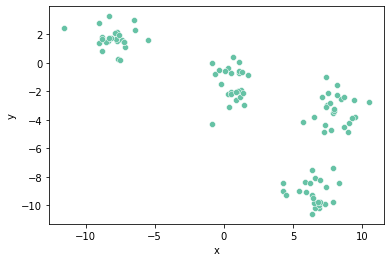

In [ ]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2");

**Step 2. 중심점(Centroid) 구하기**

In [ ]:
centroids = points.sample(4, random_state=1)
centroids

,x,y
80,-8.842286,1.786914
84,4.510561,-9.305970
33,5.883975,-8.372845
81,-8.831594,1.690414


**Step3. 각 중심점으로부터의 거리를 구하여 가까운 중심점의 cluster로 할당하기**

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()


,x,y,cluster
0,0.276181,-2.217047,1
1,7.927368,-9.761527,2
2,8.491428,-2.549749,2
3,-11.537102,2.434883,0
4,4.292259,-8.992204,1


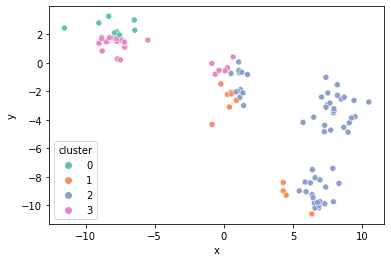

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

**Step 4. 변경된 cluster에 대해서 중심점 구하기**

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_2 = result.groupby("cluster").mean()
centroids_2

,x,y
cluster,,
0,-8.211603,2.420481
1,1.913263,-5.034035
2,6.180105,-5.007395
3,-5.728498,0.878158


**Step 5. 각 중심점으로부터의 거리를 구하여 가까운 중심점의 cluster로 할당하기**

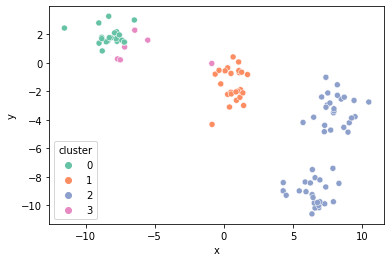

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");


**Step 6. Step 4, 5 반복하기**

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_3 = result.groupby("cluster").mean()
centroids_3

,x,y
cluster,,
0,-8.240005,1.878027
1,0.645054,-1.534647
2,7.281412,-6.216551
3,-5.865201,0.899843


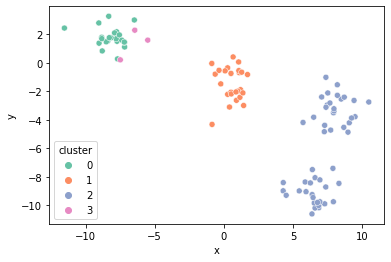

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_3, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_4 = result.groupby("cluster").mean()
centroids_4

,x,y
cluster,,
0,-8.167045,1.769716
1,0.584424,-1.475251
2,7.281412,-6.216551
3,-6.481871,1.358530


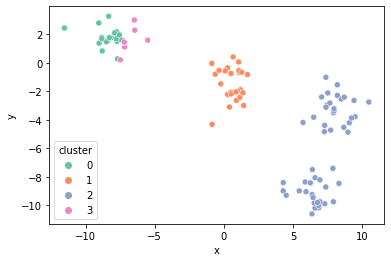

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_4, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

In [ ]:
# cluster별로 묶어서 평균 계산
centroids_5 = result.groupby("cluster").mean()
centroids_5

,x,y
cluster,,
0,-8.423578,1.774803
1,0.584424,-1.475251
2,7.281412,-6.216551
3,-6.785169,1.580413


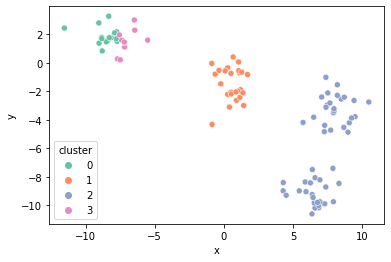

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids_5, "euclidean")

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set2");

#**Scikit-Learn을 이용해보자**

In [ ]:
from sklearn.cluster import KMeans

# k-means clustering 실행
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,0.276181,-2.217047,3
1,7.927368,-9.761527,2
2,8.491428,-2.549749,0
3,-11.537102,2.434883,1
4,4.292259,-8.992204,2


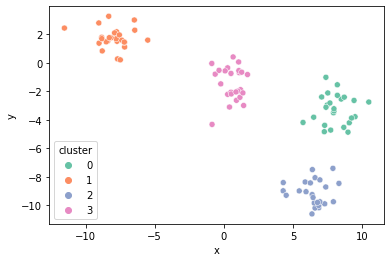

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");